In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import IPython.display
#plt.style.use("dark_background")
#matplotlib.use("TkAgg")
from function.etc import PerlinNoiseFactory

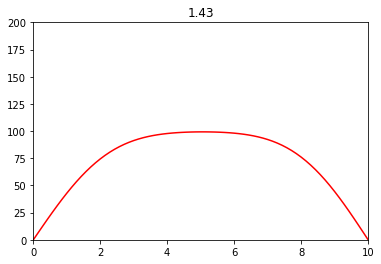

In [2]:
fig, ax = plt.subplots()

rho = 1 # density
cp = 1 # specific heat
K = 1 # thermal conductivity

A = K/rho/cp

L = 10
ax.set_xlim((0, L))
ax.set_ylim((0, 200))

Nx = 71
Nt = 1000
dx = L/(Nx-1)

c = 1
C = .01 # courant number
dt = C*dx/c

# field
Tn = np.zeros(Nx)
X = np.linspace(0, L, Nx)

Tn[:] = 100*np.cos(3*X) + 100
t = 0

H = np.zeros((Nx, Nt)) # (space, time)
H[:, 0] = Tn.copy()
H[0, 0] = 0
H[-1,0] = 0

for n in range(1, Nt):
    Tc = Tn.copy()
    t += dt
    for i in range(1, Nx-1):
        Tn[i] = Tc[i] + dt * A * ((Tc[i+1]-2*Tc[i] + Tc[i-1])/dx/dx)

    Tn[0] = 0
    Tn[-1] = 0
    H[:, n] = Tn

wT = np.arange(0, Nt*dt, dt)

line, = plt.plot([], [], 'r')

def animate(frame):
    global H, X, ax
    ax.set_title(f"{wT[frame]:.2f}")
    line.set_data(X, H[:, frame])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=20, blit=True)
IPython.display.HTML(anim.to_html5_video())

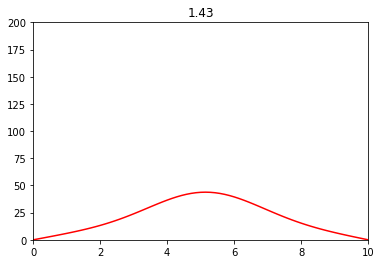

In [3]:
fig, ax = plt.subplots()

rho = 1 # density
cp = 1 # specific heat
K = 1 # thermal conductivity

A = K/rho/cp

L = 10
ax.set_xlim((0, L))
ax.set_ylim((0, 200))

Nx = 71
Nt = 1000
dx = L/(Nx-1)

c = 1
C = .01 # courant number
dt = C*dx/c

# field
Tn = np.zeros(Nx)
X = np.linspace(0, L, Nx)

Tn[:] = 10
t = 0

H = np.zeros((Nx, Nt)) # (space, time)
H[:, 0] = Tn.copy()
H[0, 0] = 0
H[-1,0] = 0

for n in range(1, Nt):
    Tc = Tn.copy()
    t += dt
    for i in range(1, Nx-1):
        Tn[i] = Tc[i] + dt * A * ((Tc[i+1]-2*Tc[i] + Tc[i-1])/dx/dx)
    s = round(Nx/2)
    if t < 0.1:
        Tn[s] = Tn[s] + dt * 10* 1000 / rho / cp
    Tn[0] = 0
    Tn[-1] = 0
    H[:, n] = Tn
    
wT = np.arange(0, Nt*dt, dt)

line, = plt.plot([], [], 'r')

def animate(frame):
    global H, X, ax
    ax.set_title(f"{wT[frame]:.2f}")
    line.set_data(X, H[:, frame])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=20, blit=True)
IPython.display.HTML(anim.to_html5_video())

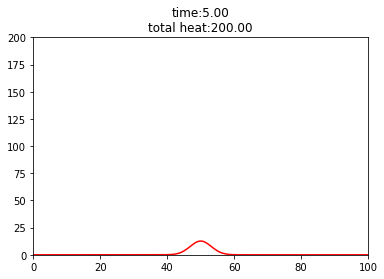

In [8]:

fig, ax = plt.subplots()

rho = 1 # density
cp = 1 # specific heat
K = 1 # thermal conductivity

A = K/rho/cp

L = 100
ax.set_xlim((0, L))
ax.set_ylim((0, 200))

Nx = 201
Nt = 1000
dx = L/(Nx-1)

c = 1
C = .01 # courant number
dt = C*dx/c

# field
Tn = np.zeros(Nx)
X = np.linspace(0, L, Nx)

Tn[:] = 0
s = round(Nx/2)
Tn[s] = 200

t = 0

H = np.zeros((Nx, Nt)) # (space, time)
H[:, 0] = Tn.copy()
H[0, 0] = 0
H[-1,0] = 0

for n in range(1, Nt):
    Tc = Tn.copy()
    t += dt
    for i in range(1, Nx-1):
        Tn[i] = Tc[i] + dt * A * ((Tc[i+1]-2*Tc[i] + Tc[i-1])/dx/dx)
    Tn[0] = 0
    Tn[-1] = 0
    H[:, n] = Tn

wT = np.arange(0, Nt*dt, dt)

line, = plt.plot([], [], 'r')

def animate(frame):
    global H, X, ax
    ax.set_title(f"time:{wT[frame]:.2f}\ntotal heat:{np.sum(H[:, frame]):.2f}")
    line.set_data(X, H[:, frame])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=20, blit=True)
IPython.display.HTML(anim.to_html5_video())